# Imports

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from scipy.special import boxcox, inv_boxcox #For boxcox transformation
from sklearn.metrics import mean_squared_error

# Other Libaries
import time
from typing import List, Dict
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
t0 = time.time() #for Runtime measurement

# Data Understanding / Exploration 

In [2]:
# Loading the data
data = pd.read_csv("train.csv")
# Taking a first look at the data
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
5,2012-08-07 12:00:00,3,0,1,2,32.80,37.880,55,8.9981,37.172015,32.801,0.000242,283
6,2012-11-06 21:00:00,4,0,1,2,12.30,14.395,56,16.9979,12.215217,12.301,0.000000,151
7,2011-07-13 22:00:00,3,0,1,1,27.88,31.820,83,12.9980,82.923722,27.881,0.000242,184
8,2012-09-19 23:00:00,3,0,1,1,19.68,23.485,67,6.0032,27.467791,19.681,0.015615,123
9,2012-06-02 12:00:00,2,0,0,1,25.42,31.060,43,23.9994,86.069186,25.421,0.015615,668


In [3]:
# Statistics describe
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


In [4]:
# Features types and not null sumerize
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'pollution'}>],
       [<AxesSubplot:title={'center':'sunlight'}>,
        <AxesSubplot:title={'center':'traffic'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

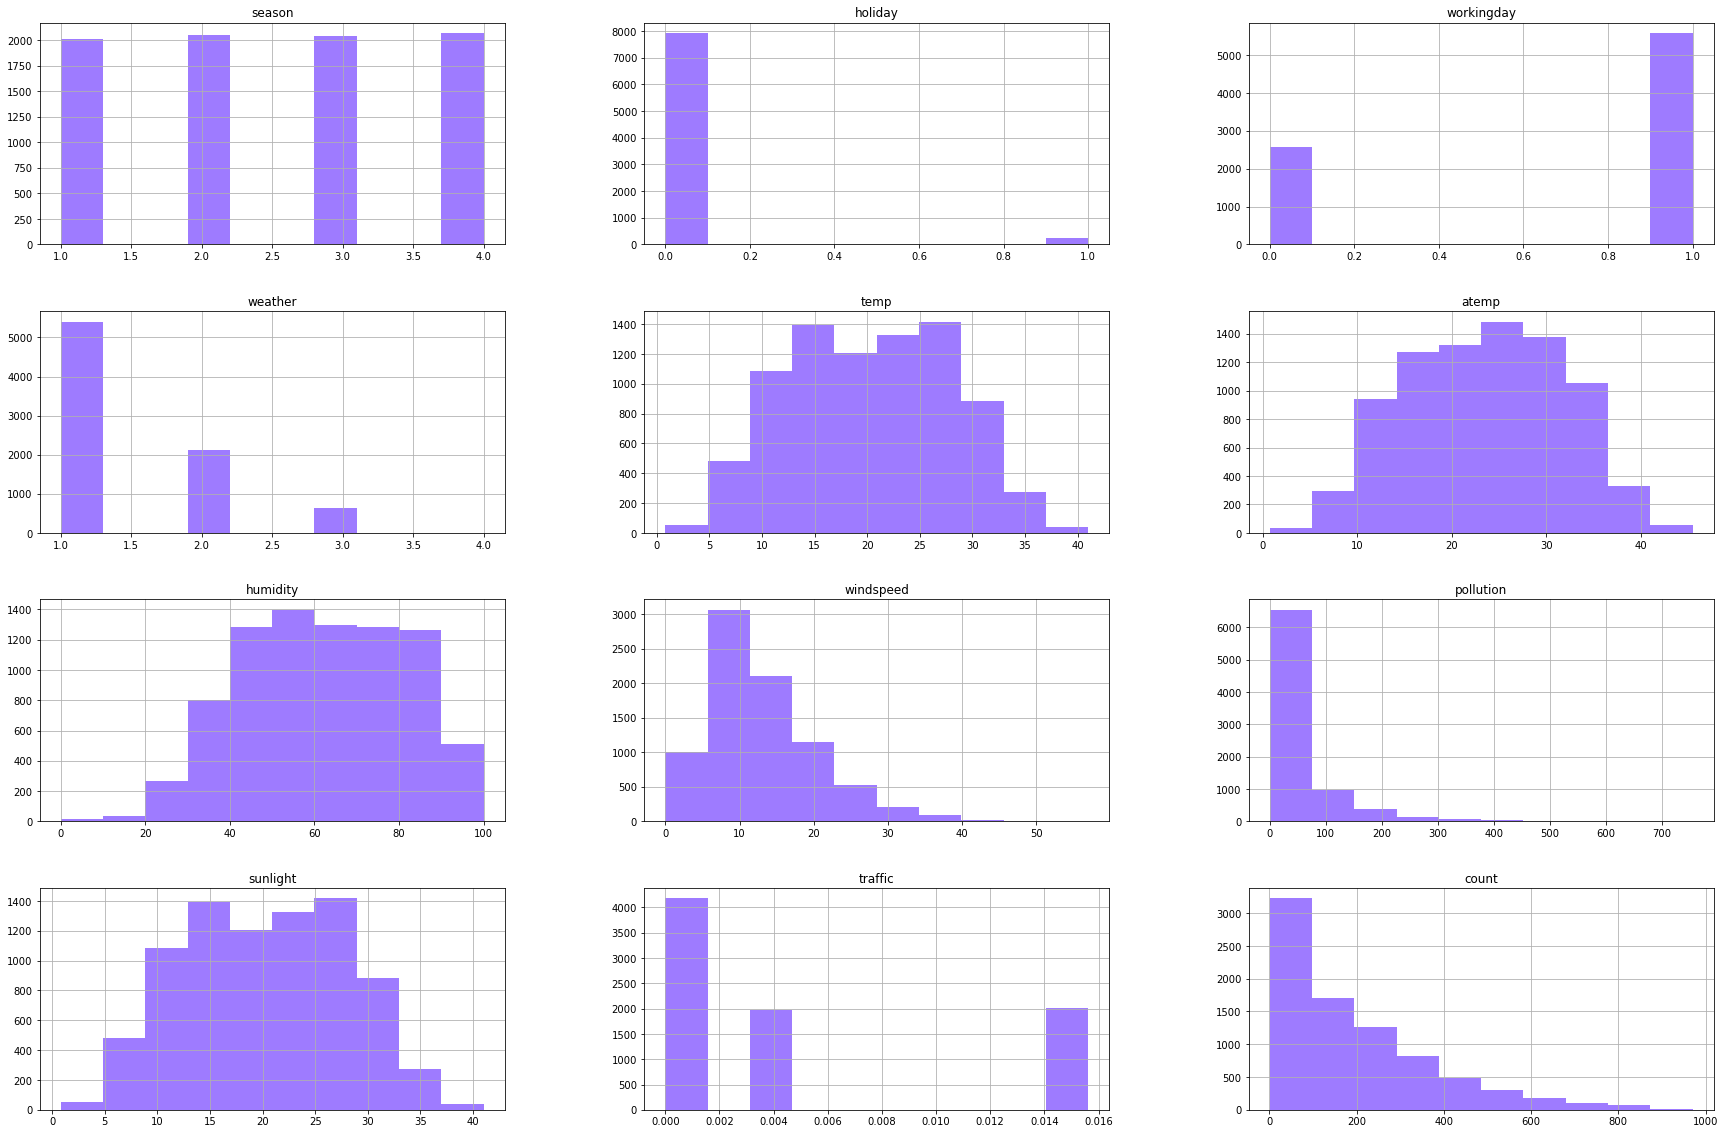

In [5]:
# Numerical features Histogtam
data.iloc[:, :].hist(figsize=(30,20),color = '#9E7BFF')

First insights:
- 'datetime' feature need to be handled from string object into more detailed features.
- 'weather' need to be handled as a catagorial feature. 
- 'Season' is a catagorial feature, eventhough it distributed between [1, 4]. In addition 'workingday', 'holiday' are catagorials features.
- 'hunidity', 'temp', 'atemp', 'sunlight' seem to be normal distributed - what can be useful in outliers detection.

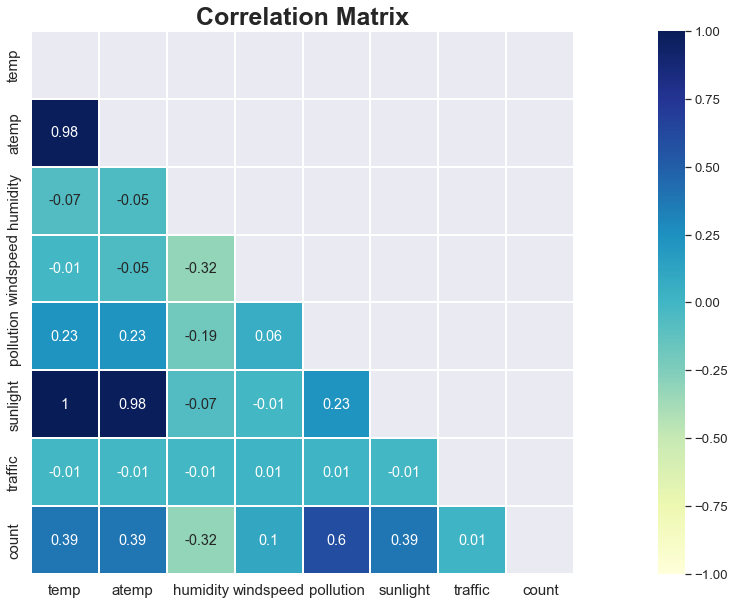

In [6]:
numerical_variabels = data[[col for col in data.columns if col not in ('season', 'holiday', 'workingday', 'weather')]]
fig = plt.figure(figsize=(30,10))
corr = numerical_variabels.corr().round(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale = 1.2)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, square=True,linewidths=2,cmap="YlGnBu", mask=mask)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Matrix",size=25, weight='bold')
plt.show()

We can wee that there is strong corralation between:
1. perfect corralation between 'temp' and 'sunlight'. Due to that, we can will remove 'sunlight' column.
2. 'sunlight' and 'atemp' (0.98)
3. 'temp' and 'atemp' (0.98)
This corralation makes sence since 'atemp' describes the average temperature. Due to that, we will consider removing one of those features.


# Rearrangement Of 'datetime' Feature Before Analyzing

As we suspected, the 'seconds' and 'minutes' are fixed to '00', so we can drop them.

In [7]:
def handle_datetime(data):
    data.insert(1, 'day_of_week', pd.to_datetime(data['datetime']).dt.dayofweek)
    split_datetime = pd.DataFrame(data['datetime'].str.split(' ').to_list(), columns = ['new_date', 'new_hour'])
    data.drop('datetime', axis=1, inplace=True)
    split_dates_df = pd.DataFrame(split_datetime['new_date'].str.split('-').to_list(), columns = ['year', 'month', 'day'])
    split_hours_df = pd.DataFrame(split_datetime['new_hour'].str.split(':').to_list(), columns = ['hour', 'minute', 'second'])
    total_time_frames = split_dates_df.join(split_hours_df)
    total_time_frames.drop(['second', 'minute'], axis=1, inplace=True)
    df = total_time_frames.join(data)
    return df
df = handle_datetime(data)

In [8]:
df

,year,month,day,hour,day_of_week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011,07,11,00,0,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012,05,18,22,4,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011,04,01,23,4,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012,09,16,09,6,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011,02,01,23,1,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012,01,14,02,5,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011,12,10,09,5,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011,12,18,16,6,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011,02,19,07,5,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


# Plotting Before Data Engineering

In [9]:
# Apply changes on months before plotting
def handle_months(df):    
    months_dict = {'12' : 'Dec','01' : 'Jan', '02' : 'Feb', '03' : 'March', '04' : 'April', '05' : 'May', '06' : 'June', '07' : 'July', '08' : 'Aug', '09' : 'Sep', '10' : 'Oct' , '11' : 'Nov'}
    df.replace({"month": months_dict},inplace=True)
    return df
df = handle_months(df)

In [10]:
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Month')]

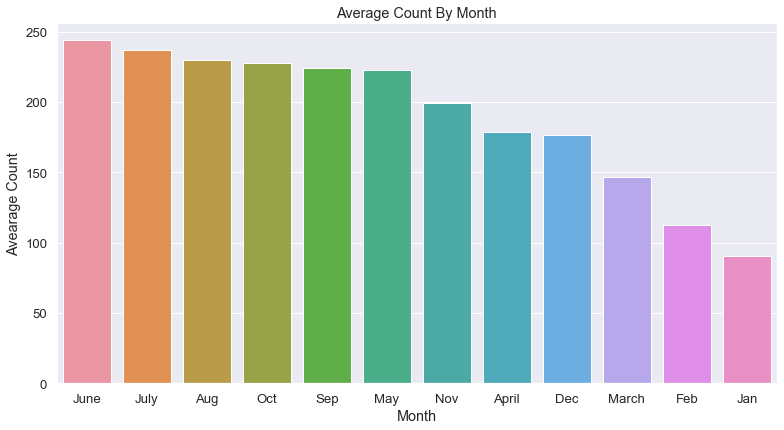

In [11]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
month_sorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=month_sorted,x="month",y="count",ax=ax)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

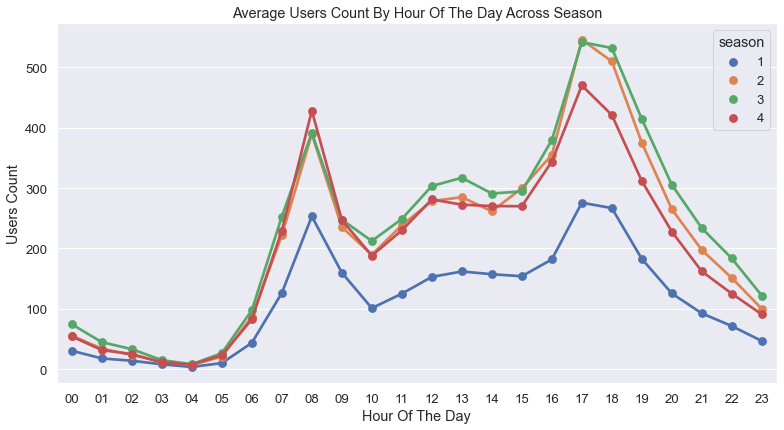

In [12]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["season"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Year'),
 None]

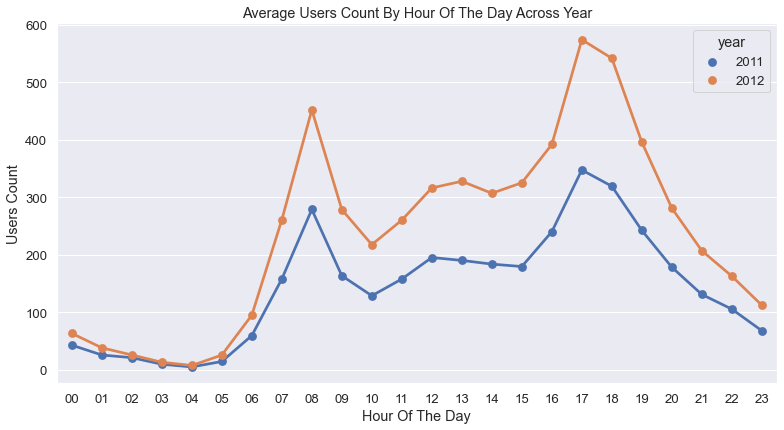

In [13]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","year"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["year"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Year",label='big')

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Holiday'),
 None]

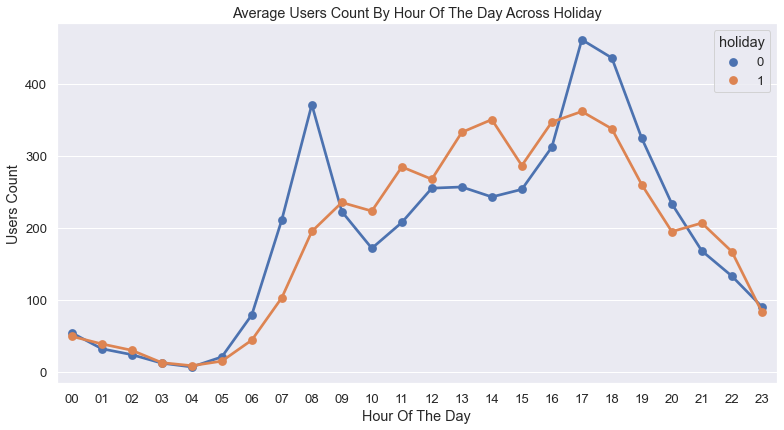

In [14]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["holiday"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Holiday",label='big')

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Workday'),
 None]

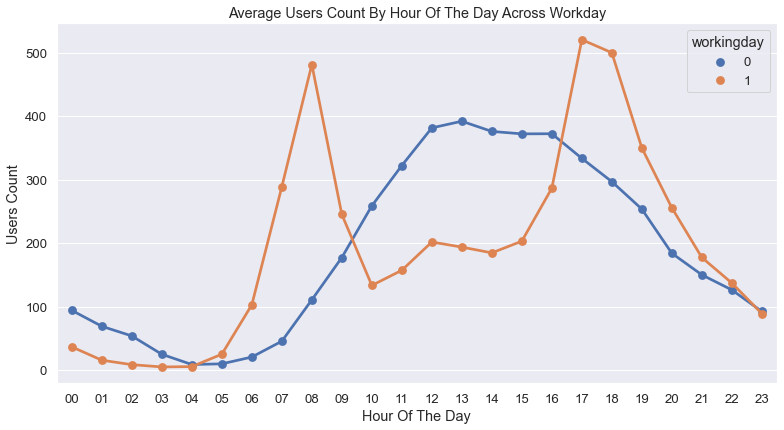

In [15]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["workingday"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Workday",label='big')

[Text(0.5, 0, 'Num Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By The Day Across Years'),
 None]

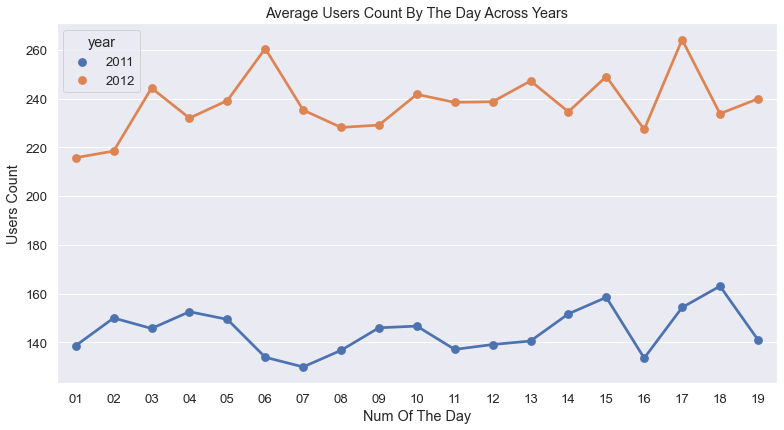

In [16]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
days_aggregated = pd.DataFrame(df.groupby(["day", "year"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=days_aggregated["day"], y=days_aggregated["count"], hue=days_aggregated["year"], data=days_aggregated, join=True,ax=ax)
ax.set(xlabel='Num Of The Day', ylabel='Users Count',title="Average Users Count By The Day Across Years",label='big')

# 'days' & 'hours' Buckets Engineering:

In [17]:
def change_day_weather_hour(df):
    day_of_week_dict = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
    df.replace({"day_of_week": day_of_week_dict},inplace=True)
    days_dic = {}
    for i in range(1,32):
        if i < 10:
            days_dic['0' + str(i)] = 'beginning_of_month'
        elif i <= 20:
            days_dic[str(i)] = 'middle_of_month'
        else:
            days_dic[str(i)] = 'end_of_month' 
    df.replace({"day": days_dic},inplace=True)
    df.rename(columns = {'day':'time_in_month'}, inplace = True)
    # Hours buckets
    df['hour'] = df['hour'].astype(int)
    working_day_hours_dict = {}
    for i in range(0, 24):
        if i <= 5:
            working_day_hours_dict[i] = 'working_day_night_ride'
        elif i <= 10 :
            working_day_hours_dict[i] ='working_day_morning_ride'
        elif i <= 15:
            working_day_hours_dict[i] ='working_day_mid_day_ride'
        elif i <= 20:
            working_day_hours_dict[i] ='working_day_afternoon_evening_ride'
        elif i <= 23:
            working_day_hours_dict[i] ='working_day_late_evening_ride'
    non_working_day_hours_dict = {}
    for i in range(0, 24):
        if i <= 7:
            non_working_day_hours_dict[i] = 'non_working_day_night_early_morning_ride'
        elif i <= 12 :
            non_working_day_hours_dict[i] ='non_working_day_morning_ride'
        elif i <= 18:
            non_working_day_hours_dict[i] ='non_working_day_mid_day_ride'
        elif i <= 23:
            non_working_day_hours_dict[i] ='non_working_day_afternoon__evening_ride'
    df.loc[df['workingday'] == 1, 'hour'] = df['hour'].map(working_day_hours_dict)
    df.loc[df['workingday'] == 0, 'hour'] = df['hour'].map(non_working_day_hours_dict)
    df.rename(columns = {'hour':'hour_bucket'}, inplace = True)
    # 'season' and 'weather' buckets
    season_dict = {1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'fall'}
    df.replace({"season": season_dict},inplace=True)
    weather_dict = {1 : 'Clear + Few clouds + Partly cloudy + Partly cloudy', 2 : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3 : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud'}
    df.replace({"weather": weather_dict},inplace=True)
    df.drop(df[df.weather == 4].index, inplace=True)
    df.rename(columns = {'workingday':'is_workingday'}, inplace = True)
    df.rename(columns = {'holiday':'is_holiday'}, inplace = True)
    return df
df = change_day_weather_hour(df)

# Weather & Seasons Exploration

In [18]:
# Creating data frame for plotting
temp_bins = [temp for temp in range(0,45,5)]
temp_buckets = []
for i in range(len(temp_bins) - 1):
    temp_buckets.append('between_' + str(temp_bins[i]) + '_to_' + str(temp_bins[i] + 5))
df['temp_buckets'] = pd.cut(x=df['temp'], bins=temp_bins, labels=temp_buckets, right=False) 
climate_df = df[['weather','temp_buckets', 'season', 'month', 'count']].copy()
df.drop('temp_buckets', axis=1, inplace=True)

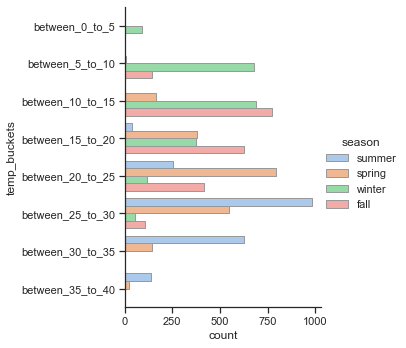

In [19]:
# temp buckets and season
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="temp_buckets", hue="season", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

* Need to cut outliers from winter with bucket of 25 to 30 degrees for example.

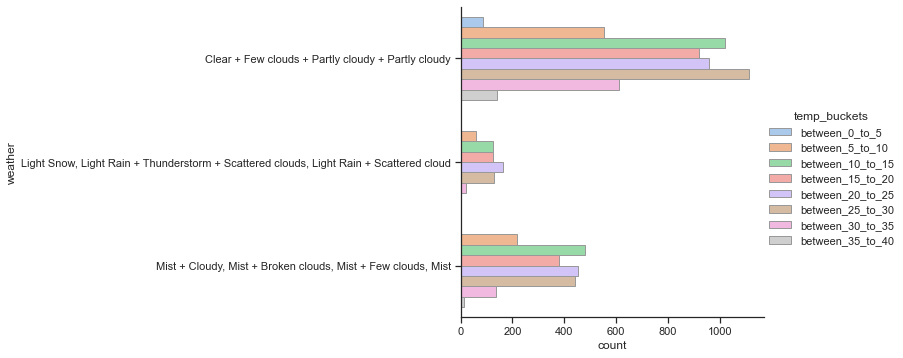

In [20]:
# weather and temp buckets
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="weather", hue="temp_buckets", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

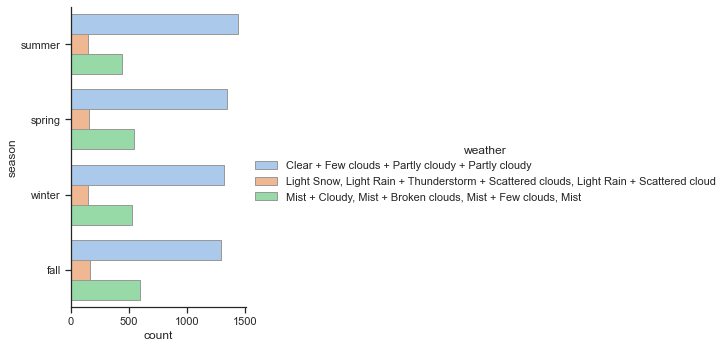

In [21]:
# weather and season
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="season", hue="weather", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

Text(0, 0.5, 'Sum of rented bicycles')

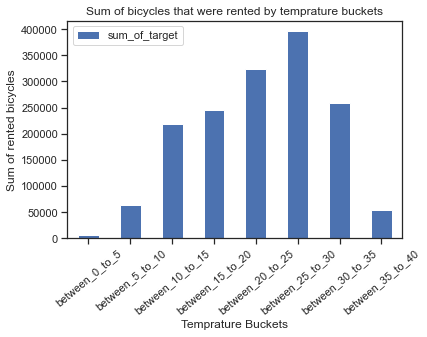

In [22]:
climate_target_relation = climate_df.groupby(['temp_buckets'])['count'].sum().to_frame('sum_of_target').reset_index()
climate_target_relation.plot(kind='bar', x = 'temp_buckets', y = 'sum_of_target', rot = 40)
plt.title("Sum of bicycles that were rented by temprature buckets")
plt.xlabel("Temprature Buckets")
plt.ylabel("Sum of rented bicycles")

Text(0, 0.5, 'Sum of rented bicycles')

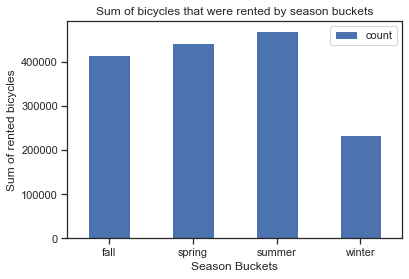

In [23]:
weather_target_relation = df.groupby(['season'])['count'].sum().to_frame('count').reset_index()
weather_target_relation.plot.bar(x = 'season', y = 'count', rot=0)
plt.title("Sum of bicycles that were rented by season buckets")
plt.xlabel("Season Buckets")
plt.ylabel("Sum of rented bicycles")

In [24]:
# fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
# fig.set_size_inches(12, 5)
# sns.regplot(x="temp", y="count", data=df,ax=ax1)
# sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
# sns.regplot(x="humidity", y="count", data=df,ax=ax3)

<AxesSubplot:xlabel='temp', ylabel='count'>

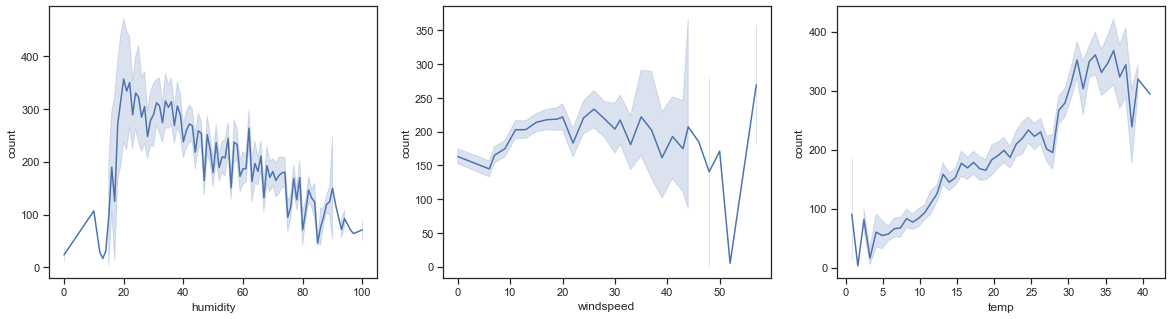

In [25]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)
sns.lineplot(data=df, x="humidity", y="count", ax=axs[0])
sns.lineplot(data=df, x="windspeed", y="count", ax=axs[1])
sns.lineplot(data=df, x="temp", y="count", ax=axs[2])

# Normal Distributed Features

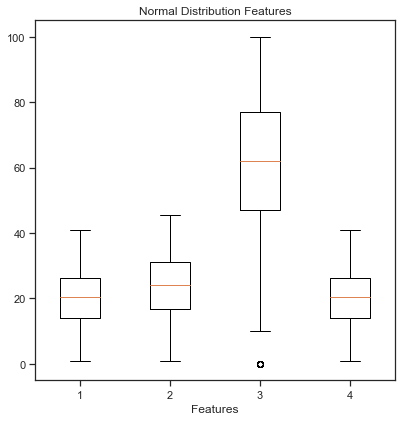

In [26]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('Features')
ax.set_title('Normal Distribution Features')
bp = ax.boxplot([df['temp'], df['atemp'], df['humidity'], df['sunlight']])
plt.show()

### Remove outleiers

In [27]:
def remove_outleiers(df ,col_name):
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new = df[df[col_name] < upper_limit]
    df = new[df[col_name] > lower_limit]
    return df
df = remove_outleiers(df, 'humidity')

In [28]:
# Check what happned
# remove outleiers according to z-score from col 
# def remove_outleiers(data ,col_name):
#     df = data[[col_name]].copy()
#     df = df.dropna()
#     outleiers_index = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].index 
#     rows_no_outl_index = data.iloc[outleiers_index, :].index
#     row_index = df.drop(rows_no_outl_index).index
#     data_clean = data.drop(row_index).copy()
#     removed = ((data.shape[0]-data_clean.shape[0])/data.shape[0])*100
#     print ("%.2f" %removed,"%" , "removed outliers", "\n")
#     return data_clean
# df = remove_outleiers(df, 'humidity')

In [29]:
# Plot notmal distributed features again to check for outleiers 
# Output box-plot of the features again to check if outleiers removal worked
#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_axes([0, 0, 1, 1])
#ax.set_xlabel('Features')
#ax.set_title('Normal Distribution Features')
#bp = ax.boxplot([df['temp'], df['atemp'], df['humidity'], df['sunlight']])
#plt.show()

# More Pre-Processing 

In [30]:
def rearrange_data(df):
    df = df[[col for col in df.columns if col != 'count'] + ['count']]
    return df

Dummies Variables

In [31]:
all_cols = df.columns
NUMERICAL_FEATURES = list(df.select_dtypes(include=[np.number]).columns)
CATAGORIAL_FEATURES = list(set(all_cols) - set(NUMERICAL_FEATURES))
NUMERICAL_FEATURES.remove('count')
NUMERICAL_FEATURES.remove('is_workingday')
NUMERICAL_FEATURES.remove('is_holiday')
df = pd.get_dummies(df, columns=CATAGORIAL_FEATURES)
df = rearrange_data(df)

In [32]:
df

,is_holiday,is_workingday,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,weather_Clear + Few clouds + Partly cloudy + Partly cloudy,...,hour_bucket_working_day_night_ride,year_2011,year_2012,time_in_month_beginning_of_month,time_in_month_middle_of_month,season_fall,season_spring,season_summer,season_winter,count
0,0,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,1,...,1,1,0,0,1,0,0,1,0,35
1,0,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,1,...,0,0,1,0,1,0,1,0,0,251
2,0,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,1,...,0,1,0,1,0,0,1,0,0,53
3,0,0,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,1,...,0,0,1,0,1,0,0,1,0,296
4,0,1,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,0,...,0,1,0,1,0,0,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0,0,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,1,...,0,0,1,0,1,0,0,0,1,38
8160,0,0,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,1,...,0,1,0,0,1,1,0,0,0,149
8161,0,0,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,1,...,0,1,0,0,1,1,0,0,0,234
8162,0,0,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,1,...,0,1,0,0,1,0,0,0,1,22


Seperating the data to X, Y matrix

In [33]:
def data_for_modeling(data):
    x = data.iloc[:, : -1]
    y= data.iloc[:, -1]
    return x, y
X_train, Y_train = data_for_modeling(df)

# Applying Changes On Test set

In [34]:
data_test = pd.read_csv("test.csv")

In [35]:
df_test = handle_datetime(data_test)
df_test = handle_months(df_test)
df_test = change_day_weather_hour(df_test)

In [36]:
df_test = pd.get_dummies(df_test, columns=CATAGORIAL_FEATURES)
df_test = rearrange_data(df_test)

In [37]:
X_test, Y_test = data_for_modeling(df_test)

# Modeling

In [38]:
models = {'Random forest': None, 'Decision tree': None, 'Linear Regression' : None}

In [132]:
models['Random forest'].best_params_

{'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1}

### Random Forest

In [39]:
# Random forest model
# We found the hyperparameters with GridSearch, to reduce runtime, only the optimal parameters were left in the grid  
# Previously searched parameters are- param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3], 'max_depth' : [None,3 , 5, 10, 30], 'min_samples_leaf' : [1, 2, 5, 10]}
def run_random_forest(x, y):
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto'],
                                      'max_depth' : [50],
                                      'min_samples_leaf' : [1]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
    tuned_rf.fit(x, y)
    return tuned_rf

### Decision Tree

In [40]:
# Decision Tree model
def run_decision_tree(x, y):
    dt = DecisionTreeRegressor(random_state=42)
    tuned_dt = GridSearchCV(estimator=dt, 
                          param_grid={'max_features': ['auto']},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
    tuned_dt.fit(x, y)
    return tuned_dt

### Linear Regressioon

In [41]:
# Linear Regression model
def run_linear_regression(x, y):
    lr = LinearRegression()
    lr.fit(x, np.ravel(y))
    cv_score = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=3)
    return lr, cv_score

### Run all models

In [42]:
# Run models:
def run_all_models(x, y):
    models_dict = {}
    models_dict['Random forest'] = run_random_forest(x, y)
    models_dict['Linear regression'] = run_linear_regression(x, y)
    models_dict['Decision tree'] = run_decision_tree(x, y) 
    return models_dict 

In [43]:
models  = run_all_models(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7355.660 total time=   7.6s
[CV 2/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7714.836 total time=   7.3s
[CV 3/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7886.381 total time=   7.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ............max_features=auto;, score=-15035.441 total time=   0.0s
[CV 2/3] END ............max_features=auto;, score=-15884.133 total time=   0.0s
[CV 3/3] END ............max_features=auto;, score=-15033.359 total time=   0.0s


In [44]:
# All CV scores
cv_scores = {}
cv_scores['Random forest'] = math.sqrt(-models['Random forest'].best_score_)
cv_scores['Decision tree'] = math.sqrt(-models['Decision tree'].best_score_ )
cv_scores['Linear regression'] = math.sqrt(-models['Linear regression'][1].mean())

cv_scores

{'Random forest': 87.47738160607369,
 'Decision tree': 123.76447168968326,
 'Linear regression': 95.54742276532393}

# Evaluate Models

## Evaluating on test set

In [45]:
def evaluate_single_model(x, y, model):
    y_pred = model.predict(x)
    return math.sqrt(mean_squared_error(y, y_pred))

In [46]:
evaluate_single_model(X_test, Y_test, models['Random forest'].best_estimator_)

84.16883976758534

In [47]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_depth=50, n_estimators=200, random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42),
 'Linear regression': LinearRegression()}

In [48]:
def evaluate_all_models(x_dict, y, models_dict):
    test_set_scores = {}
    for k, v in models_dict.items():
        test_set_scores[k] = evaluate_single_model(x_dict, y, v)
    return test_set_scores

In [49]:
test_set_scores = evaluate_all_models(X_test, Y_test.values.ravel(), trained_models_dict)
test_set_scores

{'Random forest': 84.16883976758534,
 'Decision tree': 117.477563634016,
 'Linear regression': 93.22640479335936}

<AxesSubplot:>

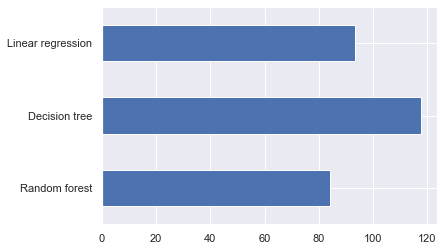

In [50]:
sns.set()
cv_scores_df = pd.DataFrame.from_dict(test_set_scores, orient='index')
cv_scores_df.plot.barh(rot=0, legend=False)

## Features importance

In [51]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [52]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [53]:
feature_importance_dict = {}

feature_importance_dict['Linear regression'] = find_normalized_lr_feature_importance(trained_models_dict['Linear regression'], X_train)
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X_train.columns)
feature_importance_dict['Decision tree'] = find_tree_feature_importance(trained_models_dict['Decision tree'], X_train.columns)

<AxesSubplot:title={'center':'Random forest'}>

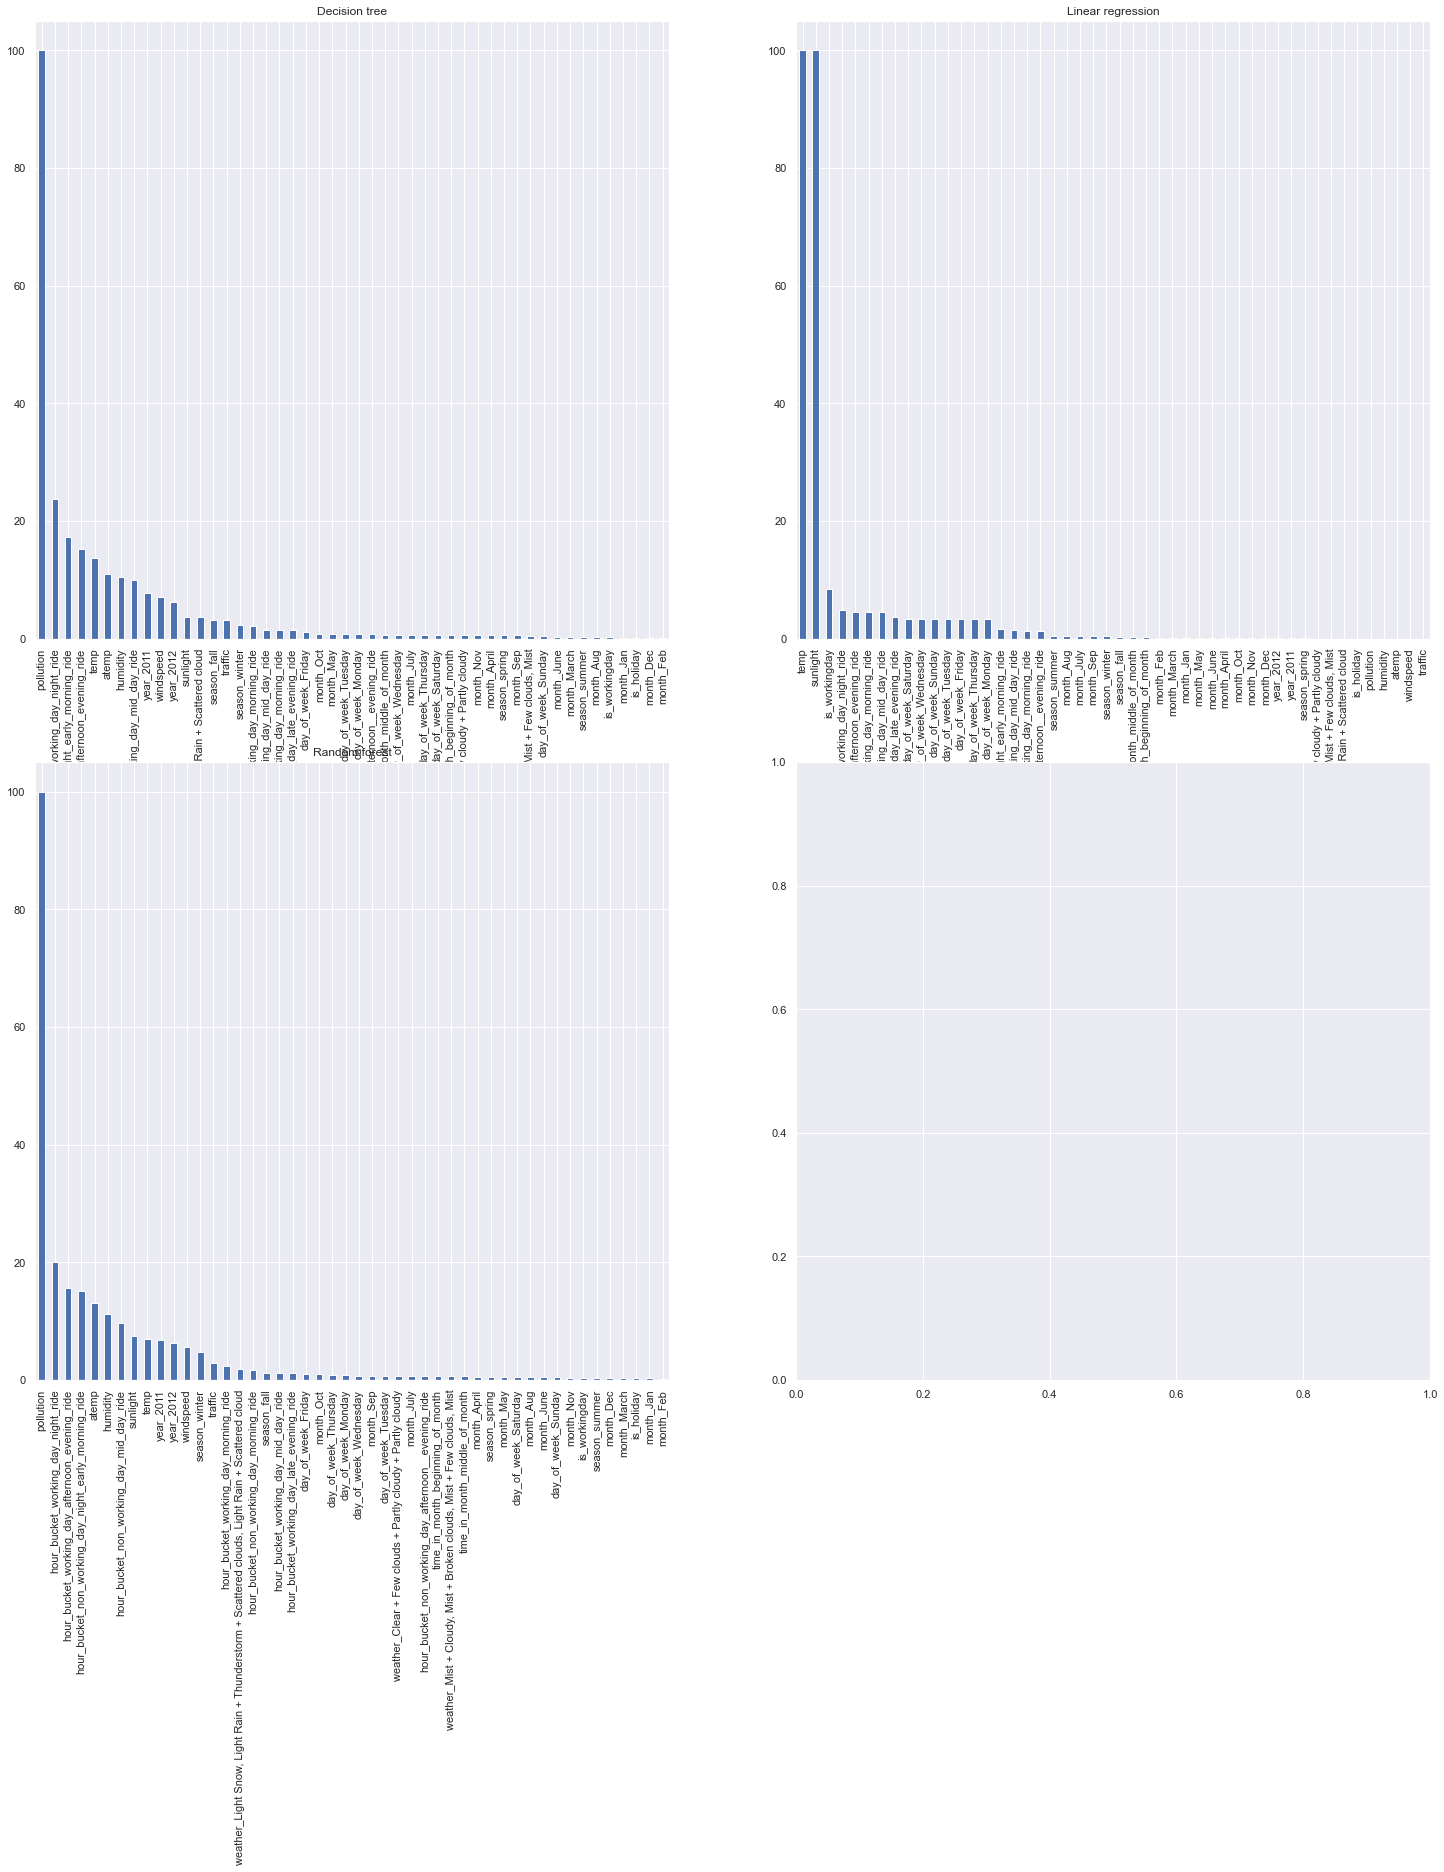

In [54]:

sns.set()

fig, axes = plt.subplots(2, 2, figsize=(25, 25))


feature_importance_dict['Decision tree'].plot(kind='bar' , ax=axes[0, 0],  legend=False, title='Decision tree' )
feature_importance_dict['Linear regression'].plot(kind='bar', ax=axes[0, 1], legend=False, title='Linear regression')
feature_importance_dict['Random forest'].plot(kind='bar', ax=axes[1, 0], legend=False, title='Random forest')



## Features removal

In [55]:
# X_train.drop('sunlight', axis=1,inplace=True)
# X_test.drop('sunlight', axis=1,inplace=True)

We wanted to remove this feature due to high correlation but we saw that the results do not improve with this removal, so we chose to leave the feature.

In [56]:
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-5:])
weak_features_dict

{'Linear regression': ['pollution',
  'humidity',
  'atemp',
  'windspeed',
  'traffic'],
 'Random forest': ['month_Dec',
  'month_March',
  'is_holiday',
  'month_Jan',
  'month_Feb'],
 'Decision tree': ['is_workingday',
  'month_Jan',
  'is_holiday',
  'month_Dec',
  'month_Feb']}

In [57]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = (X_train.drop(v, axis=1), X_test.drop(v, axis=1))

In [58]:
def run_all_models(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'][0], y)
  models_dict['Decision tree'] = run_decision_tree(x_dict['Decision tree'][0], y)
  models_dict['Linear regression'] = run_linear_regression(x_dict['Linear regression'][0], y)
  return models_dict

In [59]:
models = run_all_models(x_data_dict, Y_train.values.ravel())
models


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7335.765 total time=   7.1s
[CV 2/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7657.007 total time=   7.0s
[CV 3/3] END max_depth=50, max_features=auto, min_samples_leaf=1;, score=-7898.431 total time=   6.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ............max_features=auto;, score=-14832.098 total time=   0.0s
[CV 2/3] END ............max_features=auto;, score=-15497.593 total time=   0.0s
[CV 3/3] END ............max_features=auto;, score=-15011.869 total time=   0.0s


{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_depth': [50], 'max_features': ['auto'],
                          'min_samples_leaf': [1]},
              scoring='neg_mean_squared_error', verbose=3),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto']},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-10881.86429568, -11148.892055  , -11046.70185412]))}

In [60]:
cv_scores_after = {}
cv_scores_after['Random forest'] = math.sqrt(-models['Random forest'].best_score_)
cv_scores_after['Decision tree'] = math.sqrt(-models['Decision tree'].best_score_)
cv_scores_after['Linear regression'] = math.sqrt(-models['Linear regression'][1].mean())
cv_scores_after

{'Random forest': 87.35216596450178,
 'Decision tree': 122.93841178729902,
 'Linear regression': 105.0039018398824}

In [61]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_depth=50, n_estimators=200, random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42),
 'Linear regression': LinearRegression()}

In [62]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k][1], y, v)
  return test_set_scores

In [63]:
test_set_scores_after = evaluate_all_models(x_data_dict, Y_test, trained_models_dict)
test_set_scores_after

{'Random forest': 84.00670451571773,
 'Decision tree': 118.48253900876391,
 'Linear regression': 104.74463576362052}

## Comparing our models before and after feature removal 

In [64]:
combined_dict_after = {k: [np.abs(v), test_set_scores_after[k]] for k, v in cv_scores_after.items()}
new_scores_df = pd.DataFrame.from_dict(combined_dict_after, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,87.352166,84.006705
Decision tree,122.938412,118.482539
Linear regression,105.003902,104.744636


In [65]:
combined_dict_after = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
scores_df = pd.DataFrame.from_dict(combined_dict_after, orient='index', columns=['CV score before removed features', 'Test set score before removed features'])
scores_df

,CV score before removed features,Test set score before removed features
Random forest,87.477382,84.168840
Decision tree,123.764472,117.477564
Linear regression,95.547423,93.226405


In [ ]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(Y_test, ))

In [146]:
# Keep keys the same, and replace values according to your results and the specified type 


results = {'model': ['Random forest', 'Decision tree', 'Linear regression'],
           'Score (RMSE)': ['string1', 'string2', 'string3'],
           'Hyperparams used': [models['Random forest'].best_params_, models['Decision tree'].best_params_, 'None'],
           'Features dropped': [weak_features_dict['Random forest'], weak_features_dict['Decision tree'], weak_features_dict['Linear regression']],
           'New features created': [['list1'], ['list2'], ['list3']],
           'Runtime trainining + inference (seconds)': ['int1', 'int2', 'int3'],
           'Hardware used (GPU/CPU/TPU)': ['string1', 'string2', 'string3'],
           'Explainability (top 3 features)': [feature_importance_dict['Random forest'][0:3].index.to_list(), feature_importance_dict['Decision tree'][0:3].index.to_list(), feature_importance_dict['Linear regression'][0:3].index.to_list()]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random forest,string1,"{'max_depth': 50, 'max_features': 'auto', 'min...","[month_Dec, month_March, is_holiday, month_Jan...",[list1],int1,string1,"[pollution, hour_bucket_working_day_night_ride..."
1,Decision tree,string2,{'max_features': 'auto'},"[is_workingday, month_Jan, is_holiday, month_D...",[list2],int2,string2,"[pollution, hour_bucket_working_day_night_ride..."
2,Linear regression,string3,None,"[pollution, humidity, atemp, windspeed, traffic]",[list3],int3,string3,"[temp, sunlight, is_workingday]"


In [67]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))